In [1]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Video Details

In [2]:
file_path1 = r"C:\Users\SMART\Downloads\video_details.json"

with open(file_path1, 'r') as json_file:
    video_details = json.load(json_file)

for key, value in video_details.items():
        print(f"{key}: {value}")

title: Hopes grow of deal to free hostages in Gaza -| BBC News
channel_title: BBC News
upload_date: 2023-11-19T22:55:36Z
view_count: 114021
like_count: 982
comment_count: 904


# Extracted Comments

In [3]:
file_path2 = r"C:\Users\SMART\Downloads\Extracted_comments.csv"
df = pd.read_csv(file_path2)
df.head()

,Date,Time,Author,Comment,Likes
0,2023-11-24,04:53:05,max Shimul★,This hole is rishi sunak's ass black hole,0
1,2023-11-23,22:17:18,MAKHAN,That land belong to Palestinians. It never hav...,0
2,2023-11-23,20:03:50,Shakeel Khan,Some one is gona have to foot the bill when th...,0
3,2023-11-23,18:26:24,A Fa,So The Palestinians voted in Hamas in free ele...,0
4,2023-11-23,17:22:45,Raymond,@BBC NEWS MORE TUNNELS FOR YOU FROM AL SHIFA H...,0


In [4]:
extracted_count = len(df)
print(extracted_count)

521


# Sentiment Analysing Function

##### Positive: Score >= 0.2
##### Neutral: 0.2 > Score > -0.2
##### Negative: -0.2 >= Score

In [5]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(comment):
    sentiment_score = sia.polarity_scores(comment)['compound']
    
    if sentiment_score > 0.2:
        sentiment_label = 'Positive'  
    elif -0.2 < sentiment_score < 0.2:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'
    
    return sentiment_label, sentiment_score

## Applying sentiments to the extracted comments

In [6]:
df['Sentiment'] = df['Comment'].apply(analyze_sentiment)

df[['Sentiment Label', 'Sentiment Score']] = pd.DataFrame(df['Sentiment'].tolist(), index=df.index)
df.head()

,Date,Time,Author,Comment,Likes,Sentiment,Sentiment Label,Sentiment Score
0,2023-11-24,04:53:05,max Shimul★,This hole is rishi sunak's ass black hole,0,"(Negative, -0.5423)",Negative,-0.5423
1,2023-11-23,22:17:18,MAKHAN,That land belong to Palestinians. It never hav...,0,"(Positive, 0.7506)",Positive,0.7506
2,2023-11-23,20:03:50,Shakeel Khan,Some one is gona have to foot the bill when th...,0,"(Neutral, 0.0)",Neutral,0.0000
3,2023-11-23,18:26:24,A Fa,So The Palestinians voted in Hamas in free ele...,0,"(Positive, 0.7901)",Positive,0.7901
4,2023-11-23,17:22:45,Raymond,@BBC NEWS MORE TUNNELS FOR YOU FROM AL SHIFA H...,0,"(Neutral, 0.0)",Neutral,0.0000


In [7]:
req_columns = ["Date", "Author", "Comment", "Likes", "Sentiment Label", "Sentiment Score"]
result_df = df[req_columns]

result_df.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
0,2023-11-24,max Shimul★,This hole is rishi sunak's ass black hole,0,Negative,-0.5423
1,2023-11-23,MAKHAN,That land belong to Palestinians. It never hav...,0,Positive,0.7506
2,2023-11-23,Shakeel Khan,Some one is gona have to foot the bill when th...,0,Neutral,0.0000
3,2023-11-23,A Fa,So The Palestinians voted in Hamas in free ele...,0,Positive,0.7901
4,2023-11-23,Raymond,@BBC NEWS MORE TUNNELS FOR YOU FROM AL SHIFA H...,0,Neutral,0.0000


In [8]:
result_df.to_csv('Sentiment Report.csv', index=False)

# Data for Report

In [9]:
file_path3 = "Sentiment Report.csv"
df = pd.read_csv(file_path3)

In [10]:
Labels_names = ['Positive', 'Neutral', 'Negative']
Labels_colors = {'Positive': '#00b300', 'Neutral': '#d8d8d8', 'Negative': '#b30000'}

In [11]:
df_pos = df[df['Sentiment Label'] == 'Positive']
df_ntl = df[df['Sentiment Label'] == 'Neutral']
df_neg = df[df['Sentiment Label'] == 'Negative']

df_pos_sorted = df_pos.sort_values(by='Sentiment Score', ascending=False)
df_ntl_sorted = df_ntl.sort_values(by='Sentiment Score')
df_neg_sorted = df_neg.sort_values(by='Sentiment Score')

df_pos_likes_sorted = df_pos.sort_values(by='Likes', ascending=False)
df_ntl_likes_sorted = df_ntl.sort_values(by='Likes', ascending=False)
df_neg_likes_sorted = df_neg.sort_values(by='Likes', ascending=False)

In [12]:
DIC1 = dict(df['Sentiment Label'].value_counts())
dic1 = {}
for l in Labels_names:
    dic1[l] = DIC1[l]
print(dic1)

{'Positive': 141, 'Neutral': 131, 'Negative': 249}


## Top 5 comments for each sentiment, on the basis of sentiment score

In [13]:
df_pos_sorted.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
119,2023-11-20,olive tree,Peace be with ❤️\n\nThe Word of the LORD ALMIG...,0,Positive,0.9512
138,2023-11-20,Jonathan T. Modesto,(Daniel 9:27 was fulfilled on August 13 2023 a...,0,Positive,0.9253
286,2023-11-20,The Fastfood Show,Strongly hope that both parties negotiate for ...,6,Positive,0.9238
361,2023-11-20,"Let it Be, Summer",Sending strength to the ladies to carry on Viv...,2,Positive,0.9186
289,2023-11-20,Ria Videna,Blessed is the nation whose God is the Lord. R...,1,Positive,0.9040


In [14]:
total_rows = len(df_ntl_sorted)
middle_start = (total_rows // 2) - 2
middle_end = (total_rows // 2) + 3

df_ntl_sorted.iloc[middle_start:middle_end]

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
242,2023-11-20,Dana Manasherob,https://www.youtube.com/watch?v=xmDMdC6oGkg,0,Neutral,0.0
144,2023-11-20,AAR BOY,THE MOST HYPOCRISY IN THE WORLD IS BBC AND THE...,1,Neutral,0.0
142,2023-11-20,AJR22,So the BBC did know there was hostages in Gaza...,0,Neutral,0.0
129,2023-11-20,Robert Woods,DEFUND THE BBC,1,Neutral,0.0
128,2023-11-20,BJ,🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱❤❤❤💪,0,Neutral,0.0


In [15]:
df_neg_sorted.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
265,2023-11-20,주명화,My emotions for those victims have become dull...,1,Negative,-0.9949
440,2023-11-19,Jousung Kim,[Why Koreans?-Part 2] Why are Koreans so rude?...,1,Negative,-0.9939
17,2023-11-21,Ben Robinsonshhh,Hostage lol Ur government Ur UK terrorist gove...,0,Negative,-0.9862
314,2023-11-20,the 3 gaming Nerds,The shit breaks my heart bro. And im pro Israe...,0,Negative,-0.9826
231,2023-11-20,Elusa Saint Pierre,BBC news is very bias by only reporting the si...,0,Negative,-0.9814


## Plotting the sentiments frequency

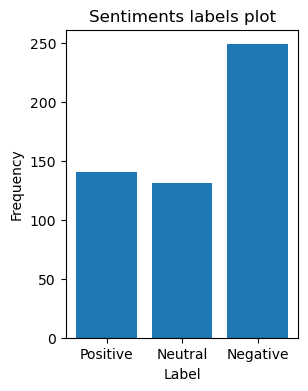

In [16]:
plt.figure(figsize=(3,4))
plt.bar(dic1.keys(), dic1.values())
plt.title("Sentiments labels plot")
plt.xlabel("Label")
plt.ylabel("Frequency")

plt.savefig('Sentiments labels plot.png')
plt.show()

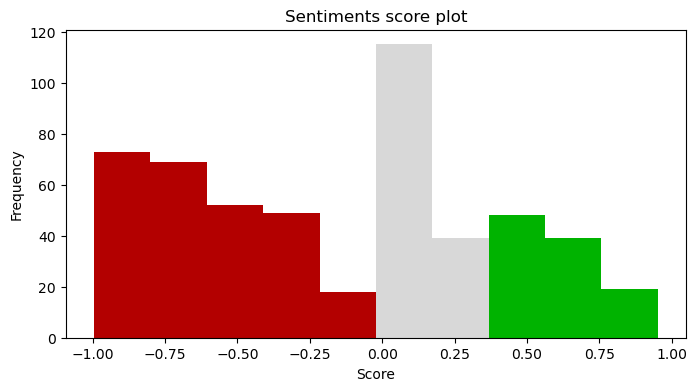

In [17]:
plt.figure(figsize=(8,4))
cnts, values, bars = plt.hist(df['Sentiment Score'], bins=10)

for i, (cnt, value, bar) in enumerate(zip(cnts, values, bars)):
    if value>=0.2:
        bar.set_facecolor(Labels_colors['Positive'])
    elif 0.2>value>-0.2:
        bar.set_facecolor(Labels_colors['Neutral'])
    else:
        bar.set_facecolor(Labels_colors['Negative'])

plt.title("Sentiments score plot")
plt.xlabel("Score")
plt.ylabel("Frequency")

plt.savefig('Sentiments score plot.png')
plt.show()

In [18]:
grouped_date_df = df.groupby(['Date', 'Sentiment Label']).size().reset_index(name='Frequency')
print(grouped_date_df)

pivot_date_df = grouped_date_df.pivot(index='Date', columns='Sentiment Label', values='Frequency').fillna(0)
print(pivot_date_df)

          Date Sentiment Label  Frequency
0   2023-11-19        Negative         31
1   2023-11-19         Neutral         32
2   2023-11-19        Positive         45
3   2023-11-20        Negative        200
4   2023-11-20         Neutral         90
5   2023-11-20        Positive         87
6   2023-11-21        Negative         13
7   2023-11-21         Neutral          4
8   2023-11-21        Positive          7
9   2023-11-22        Negative          1
10  2023-11-23        Negative          3
11  2023-11-23         Neutral          5
12  2023-11-23        Positive          2
13  2023-11-24        Negative          1
Sentiment Label  Negative  Neutral  Positive
Date                                        
2023-11-19           31.0     32.0      45.0
2023-11-20          200.0     90.0      87.0
2023-11-21           13.0      4.0       7.0
2023-11-22            1.0      0.0       0.0
2023-11-23            3.0      5.0       2.0
2023-11-24            1.0      0.0       0.0


## Comments over time 

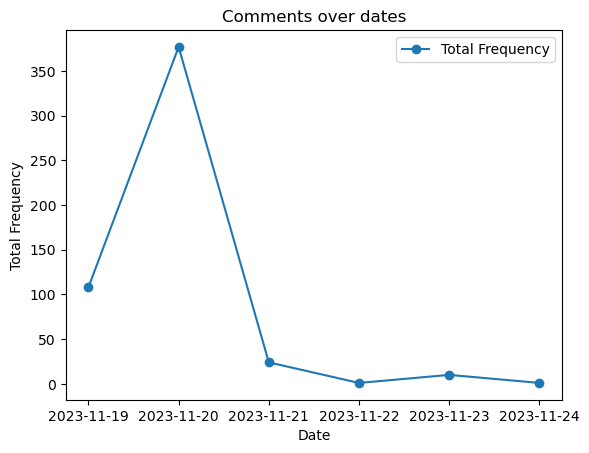

In [19]:
date_frequencies = pivot_date_df.sum(axis=1)

# Plotting the frequency graph of dates
plt.plot(date_frequencies.index, date_frequencies, marker='o', label='Total Frequency')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Total Frequency')
plt.title('Comments over dates')

plt.legend()
plt.savefig('Comments over date.png')

plt.show()

## Sentiments over time

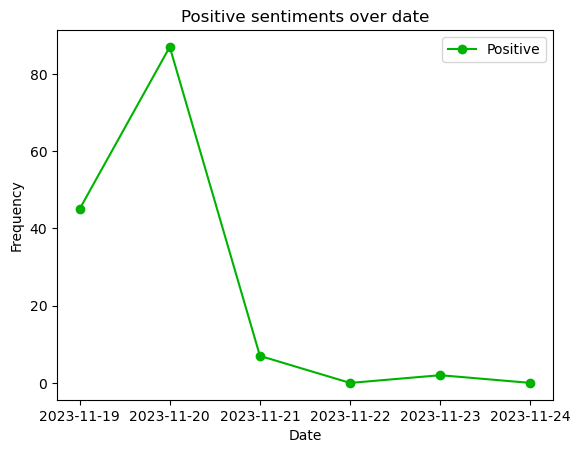

In [20]:
plt.plot(pivot_date_df.index, pivot_date_df['Positive'], marker='o', label='Positive', color = Labels_colors['Positive'])

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Positive sentiments over date')

plt.legend()
plt.savefig('Positive sentiments over date.png')

plt.show()

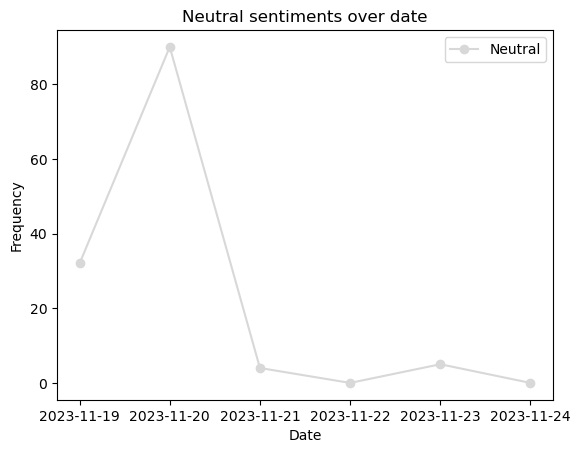

In [21]:
plt.plot(pivot_date_df.index, pivot_date_df['Neutral'], marker='o', label='Neutral', color = Labels_colors['Neutral'])

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Neutral sentiments over date')

plt.legend()
plt.savefig('Neutral sentiments over date.png')

plt.show()

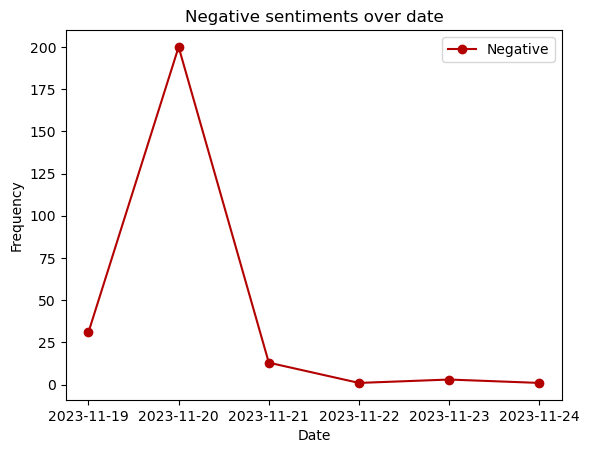

In [22]:
plt.plot(pivot_date_df.index, pivot_date_df['Negative'], marker='o', label='Negative', color = Labels_colors['Negative'])

plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Negative sentiments over date')

plt.legend()
plt.savefig('Negative sentiments over date.png')

plt.show()

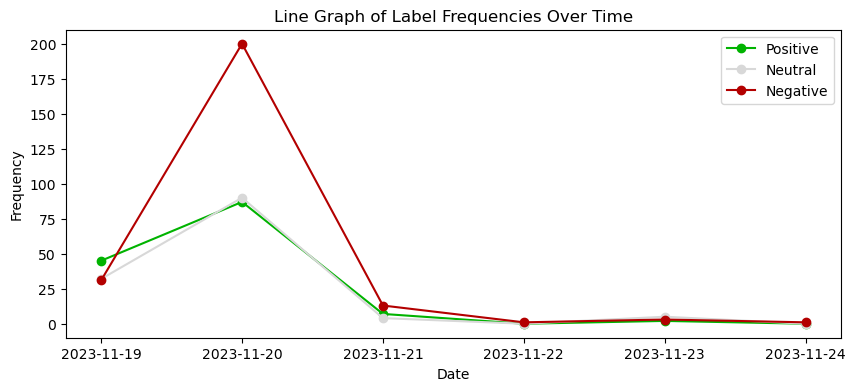

In [23]:
plt.figure(figsize=(10,4))

for label in Labels_names:
    plt.plot(pivot_date_df.index, pivot_date_df[label], marker='o', label=label, color = Labels_colors[label])


plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Line Graph of Label Frequencies Over Time')

plt.legend()
plt.savefig('Line Graph of Label Frequencies Over Time.png')

plt.show()

## Top 5 comments for each sentiment, on the basis of likes

In [24]:
df_pos_likes_sorted.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
311,2023-11-20,Ikechukwu Okafor,You can't verify Israel's videos but you can v...,94,Positive,0.6237
452,2023-11-19,Lixin Wang,Hope the hostages be back to their family safe...,84,Positive,0.4767
441,2023-11-19,Sol Schwarz,If it's a clip which benefits Israel BBC can't...,38,Positive,0.5574
368,2023-11-20,think positive,"The world needs peace for the Middle East , Uk...",26,Positive,0.5423
420,2023-11-19,Jessica Palmer,Absolutely heartbreaking 💔 Ceasefire Now 🙏♥️ S...,20,Positive,0.2844


In [25]:
df_ntl_likes_sorted.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
257,2023-11-20,Mario T,Can the BBC reporter go down the tunnel shaft ...,53,Neutral,0.000
451,2023-11-19,cento,So touching 😢,17,Neutral,0.000
310,2023-11-20,Ck,Those people should protest to Hamas and not i...,17,Neutral,-0.128
162,2023-11-20,Anthony Bernstein,"Well done BBC, the sweet dulcet tones from a r...",15,Neutral,0.128
463,2023-11-19,R8 V10,When will there be a deal to release the 6000 ...,15,Neutral,0.000


In [26]:
df_neg_likes_sorted.head()

,Date,Author,Comment,Likes,Sentiment Label,Sentiment Score
454,2023-11-19,YSBS1,"If H A M A S stand out confronting IDF, not hi...",63,Negative,-0.7790
317,2023-11-20,David Ben-Abraham,All these deaths have only Hamas to blame. In ...,43,Negative,-0.9449
401,2023-11-20,Welsh Nick,Blame Hamas.,36,Negative,-0.3400
305,2023-11-20,Owen H.,So the staff at the hospital is guilty of assi...,35,Negative,-0.4215
262,2023-11-20,Barry Smith,Those babies are so skinny poor little things ...,34,Negative,-0.8194


# Report Generation

In [27]:
from docx import Document
from docx.shared import Inches, Pt
from docx.oxml import OxmlElement

In [28]:
doc = Document()

doc.add_heading('Sentiment Analysis Report', level=1)

sections = doc.sections
for section in sections:
    section.left_margin = Inches(0.5)   # Adjust the left margin
    section.right_margin = Inches(0.5)  # Adjust the right margin
    section.top_margin = Inches(0.5)    # Adjust the top margin
    section.bottom_margin = Inches(0.5) # Adjust the bottom margin

# Video details
doc.add_heading('Video details', level=2)
p1 = doc.add_paragraph()
p1.add_run(f"\n\t• Title:  {video_details['title']}")
p1.add_run(f"\n\t• Channel:  {video_details['channel_title']}")
p1.add_run(f"\n\t• Uploaded on:  {video_details['upload_date']}")
p1.add_run(f"\n\t• Views:  {video_details['view_count']}")
p1.add_run(f"\n\t• Likes:  {video_details['like_count']}")
p1.add_run(f"\n\t• Comments:  {video_details['comment_count']}")
p1.add_run(f"\n\t• Comments extracted:  {extracted_count}")


# Sentiments Labels and scores info
doc.add_heading('Sentiments Labels and scores info', level=2)
p2 = doc.add_paragraph()
p2.add_run("\n\t• Positive: ").bold = True
p2.add_run("Score >= 0.2")
p2.add_run("\n\t• Neutral: ").bold = True
p2.add_run("0.2 > Score > -0.2")
p2.add_run("\n\t• Negative: ").bold = True
p2.add_run("-0.2 >= Score")


# Sentiments Frequency
a = str(dic1['Positive'])
b = str(dic1['Neutral'])
c = str(dic1['Negative'])

doc.add_heading('Sentiments Frequency', level=2)
p3 = doc.add_paragraph()
p3.add_run("\n\t• Positive: ").bold = True
p3.add_run(a)
p3.add_run("\n\t• Neutral: ").bold = True
p3.add_run(b)
p3.add_run("\n\t• Negative: ").bold = True
p3.add_run(c)


# Sentiments frequency plot
doc.add_heading('Sentiments Frequency plot', level=2)
p4 = doc.add_paragraph()
p4.add_run("1. Plot on the basis of sentiment labels\n").bold = True
p4.alignment = 0

p5 = doc.add_paragraph()
p5.add_run().add_picture("Sentiments labels plot.png", width=Inches(2.4), height=Inches(3.2))
p5.alignment = 1

p6 = doc.add_paragraph()
p6.add_run("\n2. Plot on the basis of sentiment scores\n").bold = True
p6.alignment = 0

p7 = doc.add_paragraph()
p7.add_run().add_picture("Sentiments score plot.png", width=Inches(6.2), height=Inches(3.1))
p7.alignment = 1


# Top comments by score, for each sentiment
doc.add_heading('Top comments for each sentiment, by score', level=2)
# Positive
dfp1 = df_pos_sorted[['Author', 'Comment', 'Sentiment Score']].head()
p8 = doc.add_paragraph()
p8.add_run("1. Positive\n").bold = True
table = doc.add_table(rows=dfp1.shape[0] + 1, cols=dfp1.shape[1])
for col, column_name in enumerate(dfp1.columns):
    table.cell(0, col).text = column_name
for row in range(dfp1.shape[0]):
    for col in range(dfp1.shape[1]):
        table.cell(row + 1, col).text = str(dfp1.iloc[row, col])
p8.add_run("\n")

# Neutral
dfnu1 = df_ntl_sorted[['Author', 'Comment', 'Sentiment Score']].head()
p9 = doc.add_paragraph()
p9.add_run("\n2. Neutral\n").bold = True
table = doc.add_table(rows=dfnu1.shape[0] + 1, cols=dfnu1.shape[1])
for col, column_name in enumerate(dfnu1.columns):
    table.cell(0, col).text = column_name
for row in range(dfnu1.shape[0]):
    for col in range(dfnu1.shape[1]):
        table.cell(row + 1, col).text = str(dfnu1.iloc[row, col])


# Negative
dfne1 = df_neg_sorted[['Author', 'Comment', 'Sentiment Score']].head()
p10 = doc.add_paragraph()
p10.add_run("\n3. Negative\n").bold = True
table = doc.add_table(rows=dfne1.shape[0] + 1, cols=dfne1.shape[1])
for col, column_name in enumerate(dfne1.columns):
    table.cell(0, col).text = column_name
for row in range(dfne1.shape[0]):
    for col in range(dfne1.shape[1]):
        table.cell(row + 1, col).text = str(dfne1.iloc[row, col])


# Comments over dates
doc.add_heading('Comments posted over dates', level=2)
p11 = doc.add_paragraph()
p11.add_run().add_picture("Comments over date.png")
p11.alignment = 1


# Sentiments and date distribution
doc.add_heading('Sentiments and date distribution', level=2)

p18 = doc.add_paragraph()
table = doc.add_table(rows=grouped_date_df.shape[0] + 1, cols=grouped_date_df.shape[1])
for col, column_name in enumerate(grouped_date_df.columns):
    table.cell(0, col).text = column_name
for row in range(grouped_date_df.shape[0]):
    for col in range(grouped_date_df.shape[1]):
        table.cell(row + 1, col).text = str(grouped_date_df.iloc[row, col])

p18.add_run("\n")


# Comments over dates, sentiment wise
doc.add_heading('Comments posted over dates, sentiment wise', level=2)
p12 = doc.add_paragraph()
p12.add_run("1. Positive").bold = True
p12.alignment = 0

p13 = doc.add_paragraph()
p13.add_run().add_picture("Positive sentiments over date.png", width=Inches(5.0), height=Inches(3.8))
p13.alignment = 1

p14 = doc.add_paragraph()
p14.add_run("\n2. Neutral").bold = True
p14.alignment = 0

p15 = doc.add_paragraph()
p15.add_run().add_picture("Neutral sentiments over date.png", width=Inches(5.0), height=Inches(3.8))
p15.alignment = 1

p16 = doc.add_paragraph()
p16.add_run("\n3. Negative").bold = True
p16.alignment = 0

p17 = doc.add_paragraph()
p17.add_run().add_picture("Negative sentiments over date.png", width=Inches(5.0), height=Inches(3.8))
p17.alignment = 1


# Comments over dates, sentiment wise, combined
doc.add_heading('Comments posted over dates, sentiment wise, combined', level=2)

p19 = doc.add_paragraph()
p19.add_run().add_picture("Line Graph of Label Frequencies Over Time.png", width=Inches(7.2), height=Inches(2.9))
p19.alignment = 1


doc.save('Sentiment Analysis Report.docx')

## Convert to PDF

In [29]:
from docx2pdf import convert

In [30]:
docx_file_path = 'Sentiment Analysis Report.docx'

pdf_file_path = 'Sentiment Analysis Report.pdf'

convert(docx_file_path, pdf_file_path)

  0%|          | 0/1 [00:00<?, ?it/s]